In [1]:
import sklearn
print(sklearn.__version__)

1.0.2


# 붓꽃 품종 예측하기

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd

# 붓꽃데이터 세트를 로딩한다.
iris = load_iris()

# iris.data는 Iris데이터 세트에서 피처만으로 구성된 numpy를 가지고 있다.
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있다.
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환한다.
iris_df = pd.DataFrame(iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


## 학습, 테스트용 데이터 분리 및 학습

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2, random_state = 11)

In [5]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state = 11)

# 학습 수행
dt_clf.fit(X_train, y_train)

# 예측 수행 
pred = dt_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(f"예측 정확도: {accuracy_score(y_test, pred)}")

예측 정확도: 0.9333333333333333


붓꽃 데이터 세트로 분류를 예측한 프로세스 정리

- 1. 데이터 세트 분리: 데이터를 학습 데이터와 테스트 데이터로 분리한다.
- 2. 모델 학습: 학습 데이터를 기반으로 ML알고리즘을 적용해 모델을 학습시킨다.
- 3. 예측 수행: 학습된 ML모델을 이용해 테스트 데이터의 분류(붓꽃 종류)를 예측한다.
- 4. 평가: 이렇게 예측된 결과값과 테스트 데이터의 실제 결과값을 비교해 ML모델 성능을 평가한다.

# 사이킷런의 기반 프레임 워크 익히기

In [6]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


In [7]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [8]:
print('\n feature_names 의 type:', type(iris_data.feature_names))
print(' feature_names 의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type:', type(iris_data.target_names))
print(' target_names의 shape:', len(iris_data.target_names))
print(iris_data.target_names)

print('\n target 의 type:', type(iris_data.target))
print(' target 의 shape:', iris_data.target.shape)
print(iris_data.target)


 feature_names 의 type: <class 'list'>
 feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type: <class 'numpy.ndarray'>
 target_names의 shape: 3
['setosa' 'versicolor' 'virginica']

 target 의 type: <class 'numpy.ndarray'>
 target 의 shape: (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Model Selection 모듈 소개

## 학습/테스트 데이터 세트 분리 - train_test_split()

### 교차검증

In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print("예측 정확도:", accuracy_score(train_label, pred))

예측 정확도: 1.0


In [10]:
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.3, random_state=121)

In [11]:
# 학습 데이터를 기반으로 DecisionTreeClassifier를 학습하고 이 모델을 이용해 예측 정확도를 측정
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


#### K 폴드 교차 검증

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state = 156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits = 5)
cv_accuracy = []
print("붓꽃 데이터 세트 크기:", features.shape[0])

붓꽃 데이터 세트 크기: 150


In [13]:
n_iter = 1

# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
  # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  

  # 반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print(f"{n_iter} 교차 검증 정확도 :{accuracy}, 학습 데이터 크기 :{train_size}, 검증 데이터 크기 :{test_size}")
  print(f"{n_iter} 검증 데이터 인덱스 :{test_index}")
  cv_accuracy.append(accuracy)
  n_iter += 1
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print("\n## 평균 검증 정확도:", np.mean(cv_accuracy))

1 교차 검증 정확도 :1.0, 학습 데이터 크기 :120, 검증 데이터 크기 :30
1 검증 데이터 인덱스 :[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
2 교차 검증 정확도 :0.9667, 학습 데이터 크기 :120, 검증 데이터 크기 :30
2 검증 데이터 인덱스 :[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
3 교차 검증 정확도 :0.8667, 학습 데이터 크기 :120, 검증 데이터 크기 :30
3 검증 데이터 인덱스 :[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
4 교차 검증 정확도 :0.9333, 학습 데이터 크기 :120, 검증 데이터 크기 :30
4 검증 데이터 인덱스 :[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
5 교차 검증 정확도 :0.7333, 학습 데이터 크기 :120, 검증 데이터 크기 :30
5 검증 데이터 인덱스 :[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


#### Stratified K 폴드

In [14]:
from sklearn.model_selection import StratifiedKFold
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

skf = StratifiedKFold(n_splits = 3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter += 1
  label_train = iris_df["label"].iloc[train_index]
  label_test = iris_df["label"].iloc[test_index]
  print("## 교차 검증: {0}".format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print("검증 레이블 데이터 분포:\n", label_test.value_counts(), '\n')

# 출력결과를 보면 합습레이블과 검증 레이블 데이터 값의 분포도가 동일하게 할당됐음을 알 수 있다.

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64 

## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64 

## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64 



In [15]:
# StratifiedKFold를 이용해 데이터를 분리한 것이다. 피처 데이터와 레이블 데이터는 앞의 붓꽃 StratifiedKFold 예제에서 추출한 데이터를 그대로 이용하겠다.

dt_clf = DecisionTreeClassifier(random_state = 156)

skfold = StratifiedKFold(n_splits = 3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = label[train_index], label[test_index]

  # 학습 및 예측
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)

  # 반복 시마다 정확도 측정
  n_iter += 1
  accuracy = np.round(accuracy_score(y_test, pred), 4)
  train_size = X_train.shape[0]
  test_size = X_test.shape[0]
  print(f'\n{n_iter} 교차 검증 정확도 :{accuracy}, 학습 데이터 크기: {train_size}, 검증 데이터 크기: {test_size}')
  print(f'#{n_iter} 검증 세트 인덱스:{test_index}')
  cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


#### 교차 검증을 보다 간편하게 - cross_val_score()

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state = 156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv = 3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


### GridSearchCV - 교차검증과 최적 하이퍼 파라미터 튜닝을 한 번에

In [17]:
grid_parameters = {'max_depth' : [1, 2, 3],
                   'min_samples_split' : [2, 3]}

In [18]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# 데이터를 로딩하고 학습데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state = 121)

dtree = DecisionTreeClassifier()

### 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth' : [1,2,3], 'min_samples_split':[2, 3]}

In [19]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정.
### refit = True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습시킴.
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 3, refit = True)

In [20]:
# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

# 인덱스 4번행을 보면 rank_test_score값이 1이다. 이는 해당 하이퍼 파라미터의 조합인 max_depth:3, min_samples_split:2로 평가한 결과 예측성능이 1위라는 의미

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [21]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print(f'GridSearchCV 최고 정확도:{grid_dtree.best_score_}')

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.975


In [22]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estirmator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
from sklearn.metrics import accuracy_score
pred = estimator.predict(X_test)
print(f"테스트 데이터 세트 정확도: {accuracy_score(y_test, pred)}")

테스트 데이터 세트 정확도: 0.9666666666666667


# 데이터 전처리

## 레이블 인코딩
- 잘안씀

In [23]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환 값:', labels)

인코딩 변환 값: [0 1 4 5 3 2 2]


In [24]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [25]:
print('디코딩 원본값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


## One-Hot Encoding

In [26]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '믹서', '믹서']

# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환합니다.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 데이터로 변환합니다.
labels = labels.reshape(-1, 1)

# 원-핫 인코딩을 적용합니다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print("원핫 인코딩 데이터")
print(oh_labels.toarray())
print('원핫 인코딩 데이터 차원')
print(oh_labels.shape)

원핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원핫 인코딩 데이터 차원
(7, 6)


In [27]:
# 원핫 인코딩을 더 쉽게 지원하는 API가 있다.
import pandas as pd

df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})

pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## StandardScaler

In [28]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃데이터 로딩 및 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [29]:
# StandardScalre 이용
from sklearn.preprocessing import StandardScaler

# StanardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환 
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns = iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

# 모든 칼럼 값의 평균이 0에 아주 가까운 값으로, 분산은 1에 아주 가까운 값으로 변환됐음을 알 수 있다.

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


## MinMaxScaler
- MinMaxScaler는 데이터값을 0~1사이의 범위 값으로 변환한다.(음수 값이 있으면 -1에서 1값으로 변환).
- 데이터 분포가 가우시안 분포가 아닐 경우에 Min, Max, Scale을 적용해 볼 수 있다.

In [30]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxscaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환. fit()과 transform()호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data = iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


## 학습데이터와 테스트데이터의 스케일링 변환 시 유의점
- Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야 한다. 그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수 있다.

In [35]:
# 테스트 데이터에 fit()을 적용하면 어떤 문제가 발생하는지 알아보자
# np.arange()를 이용해 학습데이터를 0~10까지, 테스트 데이터를 0~5까지 값을 가지는 ndarray로 생성

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0,6).reshape(-1, 1)

# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array  데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10 -> 1로 변환됨
train_scaled = scaler.transform(train_array)

print('원본 train_array데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [36]:
# 이번에는 테스트 데이터 세트를 변환화는데 fit()을 호출해 스케일링 기준 정보를 다시 적용한 뒤 transform()을 수행한 결과를 확인해보자

# MinMaxScaler에 test_array를 fit()하면 원본 데이터 값이 최소0, 최대5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5 -> 1로 변환
test_scaled = scaler.transform(test_array)

# test_array의 scale변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scaler된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scaler된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [38]:
# 바람직한 방법
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

test_scaled = scaler.transform(test_array)
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scaler된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array 데이터: [0 1 2 3 4 5]
Scaler된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


- 학습데이터와 테스트데이터의 fit(), transform(), fit_transform()을 이용해 스케일링 변환 시 유의할 점

- 1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
- 2. 1이 여의치 않다면 테스트 데이터 벼노한 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 scaler객체를 이용해 transform()으로 변환

# 사이킷런으로 수행하는 타이타닉 생존자 예측

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [41]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())

# RangeIndex는 인덱스의 범위이다. 891이므로 891개의 로우로 구성되어 있음
# 칼럼수는 12개
# Dtype이 object인것은 string과 같은 의미이다.
# Age, Cabin, Embarked는 각각 177, 608, 2개의 Null값을 가지고 있다.


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [43]:
# Null값 제거
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace = True)
print('데이터 세트 Null 값 개수 ', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수  0


In [44]:
# 현재 남아있는 문자열 피처는 sex, cabin, embarked이다. 이 피처들의 값 분류를 살펴보겠다.
print('Sex 값 분포:\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n', titanic_df['Embarked'].value_counts())

# Sex, Embarked는 문제가 없으나, Cabin의 경우 N이 687건으로 가장 많은 것도 특이하지만, 속성값이 제대로 정리가 되지 않은것 같다.

Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [45]:
# Cabin 속성의 경우 앞 문자만 추출해보겠다.
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [47]:
# 성별에 따른 생존자 수를 비교
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

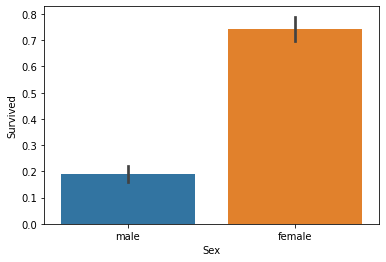

In [48]:
sns.barplot(x = "Sex", y = "Survived", data = titanic_df)

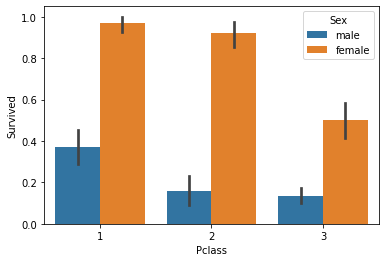

In [51]:
# 부자와 가난 사람간의 생존 확률
sns.barplot(x="Pclass", y = "Survived", hue = 'Sex',data = titanic_df)

# 여성이 남성보다 확실히 생존률이 높고, 3등석보다는 1,2등석이 더 생존률이 높다

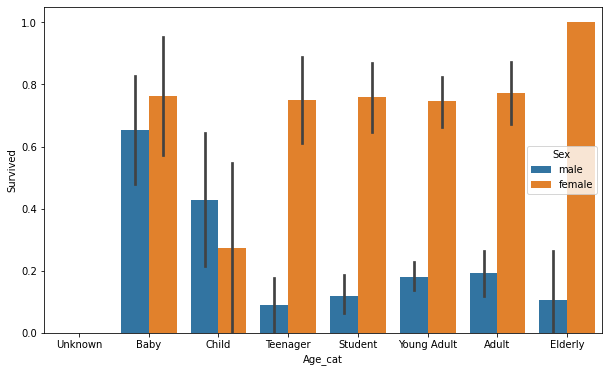

In [52]:
# 나이에 따른 생존 확률

# 입력 age에 따라 구분 값을 반환하는 함수 설정, DataFrame의 apply lambda 식에 사용 
def get_category(age):
  cat = ''
  if age <= -1:
    cat = 'Unknown'
  elif age <= 5:
    cat = 'Baby'
  elif age <= 12:
    cat = 'Child'
  elif age <= 18:
    cat = 'Teenager'
  elif age <= 25:
    cat = 'Student'
  elif age <= 35:
    cat = 'Young Adult'
  elif age <= 60:
    cat = "Adult"
  else:
    cat = "Elderly"

  return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize = (10, 6))

# X축 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df["Age_cat"] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x = "Age_cat", y = "Survived", hue='Sex', data = titanic_df, order = group_names)
titanic_df.drop('Age_cat', axis = 1, inplace = True)

# Baby의 경우 생존확률이 높았다. 아쉽게도 여자 Child경우 다른 연령대에 비해 생존 확률이 낮다. 여자 Elderly의 경우 생존률 매우 높음

# 분석결과 Sex, Age, PClass 등이 생존을 좌우하는 피처임을 알 수 있었다.

In [53]:
# 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환하겠다.
# 인코딩은 사이킷런의 LabelEncoding 클래스를 이용해 레이블 인코딩을 적용하겠다. 이것은
# 카테고리 값의 유형 수에 따라 0~ ( 카테고리 유형수 -1) 까지의 숫자 값으로 변환한다.

from sklearn import preprocessing

def encode_features(dataDF):
  features = ["Cabin", "Sex", "Embarked"]
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [59]:
# 지금까지 피처를 가공한 내역을 정리하고 이를 함수로 만들어 쉽게 재사용할 수 있도록 만들겠다.

# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace = True)
  df['Cabin'].fillna('N', inplace = True)
  df['Embarked'].fillna("N", inplace = True)
  df['Fare'].fillna(0, inplace = True)
  return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
  return df

# 레이블 인코딩 수행.
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])

  return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [72]:
# 함수이용해 원본데이터 가공

titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)

X_titanic_df = transform_features(X_titanic_df)

In [73]:
# 내려받은 학습데이터를 기반으로 해서 train_test_split 사용
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titainc_df, y_titanic_df, test_size = 0.2, random_state = 11)

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [68]:
# 결정트리, 랜덤포레스트, 로지스틱회귀를 위한 사이킷런의 Classifier 클래스 생성

dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression()

# DecisionTreeClssifier 학습 예측 평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print(f'DecisionTreeClassifier 정확도:{accuracy_score(y_test, dt_pred)}')

# RandomForestClassifier 학습 예측 평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test) 
print(f'RandomForestClassifier 정확도:{accuracy_score(y_test, rf_pred)}')

# LogisticRegression 학습 예측 평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(f"LogisticRegression 정확도:{accuracy_score(y_test, lr_pred)}")

#  로지스틱이 젤 높다. 그러나 최적화작업도 안했고 데이터 양도 충분하지 않았기 때문에 어떤 알고리즘이 가장 성능이 좋다고 평가하긴 힘들다.

DecisionTreeClassifier 정확도:0.7877094972067039
RandomForestClassifier 정확도:0.8547486033519553
LogisticRegression 정확도:0.8491620111731844


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [76]:
# 교차검증으로 평가 
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측 결과 저장을 위한 리스트 객체 생성
  kfold = KFold(n_splits=  folds)
  scores = []

  #KFold 교차 검증 수행.
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    # Classifier 학습 예측 정확도 계산
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print(f"교차 검증 {iter_count} 정확도: {accuracy}")
  
  # 5개 fold에서의 평균 정확도 계산
  mean_score = np.mean(scores)
  print(f'평균 정확도: {mean_score}')

# 함수 호출
exec_kfold(dt_clf, folds = 5)

교차 검증 0 정확도: 0.7541899441340782
교차 검증 1 정확도: 0.7808988764044944
교차 검증 2 정확도: 0.7865168539325843
교차 검증 3 정확도: 0.7696629213483146
교차 검증 4 정확도: 0.8202247191011236
평균 정확도: 0.782298662984119


In [77]:
# 교차 검증을 cross_val_score를 이용해 수행
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
  print(f"교차 검증{iter_count}:{accuracy}")

print(f'평균 정확도:{np.mean(scores)}')

교차 검증0:0.7430167597765364
교차 검증1:0.7752808988764045
교차 검증2:0.7921348314606742
교차 검증3:0.7865168539325843
교차 검증4:0.8426966292134831
평균 정확도:0.7879291946519366


In [80]:
# GridSearchCV 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측성능 측정

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2, 3, 5, 10],
              'min_samples_split':[2,3,5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv=5)
grid_dclf.fit(X_train, y_train) 

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print(f'GridSearchCV 최고 정확도: {grid_dclf.best_score_}')
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print(f'테스트 세트에서의 DecisionTreeClassfier 정확도 : {accuracy}')

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7991825076332119
테스트 세트에서의 DecisionTreeClassfier 정확도 : 0.8715083798882681
